# **MultiModel Airline Agent**

### Cell 0: Environment Setup (Installing Free Tools)

In [ ]:
# 1. Installing standard and multi-modal libraries
!apt-get update && apt-get install -y zstd # Ollama prerequisite
!pip install openai gradio python-dotenv diffusers transformers accelerate gTTS Pillow

# Install Ollama
!curl -fsSL https://ollama.com/install.sh | sh

# 2. Starting Ollama Server in background
import subprocess
import time

subprocess.Popen(["ollama", "serve"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
time.sleep(15) # Server boot time

# 3. Pulling the best 'Brain' model for tool calling
!ollama pull qwen2.5:3b

print("\n--- Cell 0 Complete: Free environment is ready! ---")

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://cli.github.com/packages stable InRelease [3,917 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,302 kB]
Get:11 https://cli.github.com/packages stable/main amd64 Packages [354 B]
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu ja

### Cell 1: Imports & Client Initialization

In [ ]:
import os
import json
import sqlite3
from openai import OpenAI
import gradio as gr
from gtts import gTTS # Free Audio
import torch
from diffusers import StableDiffusionPipeline # Free Images

# 1. Initialize local Ollama client
client = OpenAI(base_url='http://localhost:11434/v1', api_key='ollama')
MODEL = "qwen2.5:3b"

# 2. Setup Free Image Generator (Stable Diffusion)
# Note: Ensure Colab is on T4 GPU for this to be fast
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

print(f"Cell 1: Client and Free Multimodal tools initialized using {MODEL}!")

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Cell 1: Client and Free Multimodal tools initialized using qwen2.5:3b!


### Cell 2: Defining Free Tools (Artist & Talker)

In [ ]:
# Free Image Generator Function
def artist(city):
    print(f"Generating Free Image for {city}...")
    prompt = f"A vibrant pop-art style travel poster of {city} showing famous landmarks."
    image = pipe(prompt).images[0]
    return image

# Free Audio Generator Function
def talker(message):
    print("Generating Free Audio...")
    tts = gTTS(text=message, lang='en')
    tts.save("reply.mp3")
    return "reply.mp3"

print("Cell 2: Free Artist and Talker tools are ready!")

Cell 2: Free Artist and Talker tools are ready!


### Cell 3: Database Initialization (The Data Source)

In [ ]:
# 1. Database file path define karein
DB = "prices.db"

# 2. Table create karein aur sample data bharein
def setup_database():
    with sqlite3.connect(DB) as conn:
        cursor = conn.cursor()
        # Table structure: city (text) aur price (real number)
        cursor.execute('CREATE TABLE IF NOT EXISTS prices (city TEXT PRIMARY KEY, price REAL)')

        # Sample prices populate karna
        flight_data = [
            ("london", 799),
            ("paris", 899),
            ("tokyo", 1420),
            ("sydney", 2999),
            ("new york city", 950)
        ]
        cursor.executemany('INSERT OR REPLACE INTO prices VALUES (?, ?)', flight_data)
        conn.commit()

setup_database()
print("Cell 3: Database 'prices.db' setup complete with flight data!")

Cell 3: Database 'prices.db' setup complete with flight data!


### Cell 4: System Message & The Tool Function

In [ ]:
# 1. System Prompt: AI ko uski pehchan aur rules batana
system_message = """
You are a professional Customer Support Agent for FlightAI airline.
Give short, courteous answers, no more than 1 sentence.
Always be accurate. If you don't know the answer, say so.
"""

# 2. Python Tool Function: Database se price nikalna
def get_ticket_price(city):
    # Print statement debugging ke liye
    print(f"DATABASE TOOL CALLED: Getting price for {city}", flush=True)

    with sqlite3.connect(DB) as conn:
        cursor = conn.cursor()
        cursor.execute('SELECT price FROM prices WHERE city = ?', (city.lower(),))
        result = cursor.fetchone()

        if result:
            return f"The ticket price to {city} is ${result[0]}"
        else:
            return f"I'm sorry, I don't have price data for {city} right now."

# Test call (AI ke baghair check karein)
print(get_ticket_price("London"))

DATABASE TOOL CALLED: Getting price for London
The ticket price to London is $799.0


### Cell 5: Tool Description (AI's Instruction Manual)

In [ ]:
# Function ki tafseel JSON format mein
price_function = {
    "name": "get_ticket_price",
    "description": "Get the price of a return ticket to the destination city.",
    "parameters": {
        "type": "object",
        "properties": {
            "destination_city": {
                "type": "string",
                "description": "The city that the customer wants to travel to",
            },
        },
        "required": ["destination_city"],
        "additionalProperties": False
    }
}

# Tools ki list jo AI ko bheji jayegi
tools = [{"type": "function", "function": price_function}]

print("Cell 5: Tool described and ready for AI to use!")

Cell 5: Tool described and ready for AI to use!


### Cell 6: The Multi-modal Tool Handler

In [ ]:
def handle_tool_calls_and_return_cities(message):
    # This list will store the technical responses for the AI
    responses = []
    # This list will track any cities mentioned so we can draw them later
    cities = []

    # Loop through each tool call requested by the AI
    for tool_call in message.tool_calls:
        if tool_call.function.name == "get_ticket_price":
            # Extract arguments and identify the city
            arguments = json.loads(tool_call.function.arguments)
            city = arguments.get('destination_city')

            # Store the city for the image generator
            cities.append(city)

            # Call the SQL database tool we defined in Cell 4
            price_details = get_ticket_price(city)

            # Format the response for the LLM history
            responses.append({
                "role": "tool",
                "content": str(price_details),
                "tool_call_id": tool_call.id
            })

    return responses, cities

print("Cell 6: Multi-modal handler with city detection is ready!")

Cell 6: Multi-modal handler with city detection is ready!


### Cell 7: The Final Agentic Chat Logic

In [ ]:
def chat(history):
    # Scrub the history to keep only role and content for local model compatibility
    messages = [{"role": "system", "content": system_message}]
    for entry in history:
        messages.append({"role": entry["role"], "content": entry["content"]})

    # Initial call to Ollama with tools enabled
    response = client.chat.completions.create(model=MODEL, messages=messages, tools=tools)
    detected_cities = []
    image = None

    # The Agentic Loop: Keep calling tools until the AI is ready to give a final answer
    while response.choices[0].finish_reason == "tool_calls":
        ai_message = response.choices[0].message

        # Process tools and capture city names for the artist
        tool_responses, cities = handle_tool_calls_and_return_cities(ai_message)
        detected_cities.extend(cities)

        # Append the AI's request and the tool's result to the conversation
        messages.append(ai_message)
        messages.extend(tool_responses)

        # Call the model again with the new data
        response = client.chat.completions.create(model=MODEL, messages=messages, tools=tools)

    # Get the final text response from the AI
    reply = response.choices[0].message.content
    history += [{"role": "assistant", "content": reply}]

    # Generate multi-modal outputs: Voice and Image
    voice = talker(reply) # Convert text response to audio file

    if detected_cities:
        # Pass the first detected city to our free Stable Diffusion artist
        image = artist(detected_cities[0])

    # Return all three outputs for the custom Gradio Blocks UI
    return history, voice, image

print("Cell 7: Advanced Agentic Logic with Triple-Output is ready!")

Cell 7: Advanced Agentic Logic with Triple-Output is ready!


### Cell 8: The Multimodal Gradio UI (The Finale)

In [ ]:
# Function to immediately show the user's message in the chatbot UI
def put_message_in_chatbot(user_msg, chat_history):
    # Clears the input box and appends the user message to history
    return "", chat_history + [{"role": "user", "content": user_msg}]

# Constructing the Custom UI using Gradio Blocks
with gr.Blocks() as ui:
    # Row 1: Chatbot window on the left and Image output on the right
    with gr.Row():
        chatbot = gr.Chatbot(height=500, type="messages")
        image_output = gr.Image(height=500, interactive=False, label="Destination Preview")

    # Row 2: Audio player for the AI's voice response
    with gr.Row():
        audio_output = gr.Audio(autoplay=True, label="Assistant's Voice")

    # Row 3: Textbox for the user to type their flight queries
    with gr.Row():
        user_input = gr.Textbox(label="Chat with our AI Assistant (FlightAI):", placeholder="e.g., How much is a flight to London?")

    # Event Chaining: First update the UI with the user message, then call the Agent logic
    user_input.submit(
        put_message_in_chatbot,
        inputs=[user_input, chatbot],
        outputs=[user_input, chatbot]
    ).then(
        chat,
        inputs=chatbot,
        outputs=[chatbot, audio_output, image_output]
    )

# Launching the multimodal interface
ui.launch(debug=True)

/tmp/ipython-input-4037679695.py:10: DeprecationWarning: The default value of 'allow_tags' in gr.Chatbot will be changed from False to True in Gradio 6.0. You will need to explicitly set allow_tags=False if you want to disable tags in your chatbot.
  chatbot = gr.Chatbot(height=500, type="messages")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://8adae1f85a22ac2db1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Generating Free Audio...
Generating Free Audio...
DATABASE TOOL CALLED: Getting price for London
Generating Free Audio...
Generating Free Image for London...


  0%|          | 0/50 [00:00<?, ?it/s]

DATABASE TOOL CALLED: Getting price for London
DATABASE TOOL CALLED: Getting price for Paris
DATABASE TOOL CALLED: Getting price for Tokyo
Generating Free Audio...
Generating Free Image for London...


  0%|          | 0/50 [00:00<?, ?it/s]

Generating Free Audio...
Generating Free Audio...
DATABASE TOOL CALLED: Getting price for london
Generating Free Audio...
Generating Free Image for london...


  0%|          | 0/50 [00:00<?, ?it/s]

DATABASE TOOL CALLED: Getting price for Paris
DATABASE TOOL CALLED: Getting price for Tokyo
Generating Free Audio...
Generating Free Image for Paris...


  0%|          | 0/50 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://8adae1f85a22ac2db1.gradio.live


Restart Ollama Server Cell (Run this First)

In [ ]:
# 1. Kill any stale Ollama processes
!pkill ollama

# 2. Re-start the Ollama server in background
import subprocess
import time

subprocess.Popen(["ollama", "serve"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# 3. Give it plenty of time to warm up
print("Waking up Ollama... please wait for 20 seconds.")
time.sleep(20)

# 4. Verify if the server is actually responding
!curl http://localhost:11434/api/tags

Waking up Ollama... please wait for 20 seconds.
{"models":[{"name":"qwen2.5:3b","model":"qwen2.5:3b","modified_at":"2026-01-18T02:41:56.297363009Z","size":1929912432,"digest":"357c53fb659c5076de1d65ccb0b397446227b71a42be9d1603d46168015c9e4b","details":{"parent_model":"","format":"gguf","family":"qwen2","families":["qwen2"],"parameter_size":"3.1B","quantization_level":"Q4_K_M"}}]}

### Updated Cell 8: The Beautiful Multimodal UI

In [ ]:
# Updated CSS for better visibility and modern look
custom_css = """
.main-header {
    text-align: center;
    padding: 20px;
    background: linear-gradient(90deg, #4b6cb7 0%, #182848 100%);
    color: white;
    border-radius: 10px;
    margin-bottom: 20px;
}
.status-tag {
    font-size: 0.8em;
    color: #666;
    font-style: italic;
}
"""

with gr.Blocks(theme=gr.themes.Default(), css=custom_css) as ui:

    # Styled Title using HTML for maximum visibility
    gr.HTML(
        """
        <div class="main-header">
            <h1>✈️ FlightAI: Multimodal Travel Agent</h1>
            <p>Instant Flight Prices • Virtual Tours • Voice Support</p>
        </div>
        """
    )

    with gr.Row():
        # Chat column
        with gr.Column(scale=2):
            chatbot = gr.Chatbot(
                height=450,
                type="messages",
                label="FlightAI Chat",
                avatar_images=(None, "https://cdn-icons-png.flaticon.com/512/4712/4712035.png") # Optional Assistant Icon
            )

        # Visuals column
        with gr.Column(scale=1):
            image_output = gr.Image(
                height=450,
                label="Destination Preview",
                interactive=False
            )

    with gr.Group(): # Groups related components together visually
        with gr.Row():
            audio_output = gr.Audio(
                autoplay=True,
                label="Voice Response",
                scale=1
            )
            message = gr.Textbox(
                label="Type your message and press Enter:",
                placeholder="Where do you want to travel?",
                scale=3,
                container=True,
                autofocus=True # Focus cursor here on load
            )

    gr.Markdown("---")
    gr.Markdown("<p class='status-tag'>System Status: SQL Database Connected | Stable Diffusion Ready | gTTS Active</p>")

    # --- THE SUBMISSION LOGIC ---
    # This specifically handles the 'Enter' key press on the textbox
    submit_event = message.submit(
        put_message_in_chatbot,
        inputs=[message, chatbot],
        outputs=[message, chatbot]
    ).then(
        chat,
        inputs=chatbot,
        outputs=[chatbot, audio_output, image_output]
    )

# Launch with sharing enabled
ui.launch(debug=True, share=True)

/tmp/ipython-input-3960358971.py:18: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Default(), css=custom_css) as ui:
/tmp/ipython-input-3960358971.py:18: DeprecationWarning: The 'css' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'css' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Default(), css=custom_css) as ui:
/tmp/ipython-input-3960358971.py:33: DeprecationWarning: The default value of 'allow_tags' in gr.Chatbot will be changed from False to True in Gradio 6.0. You will need to explicitly set allow_tags=False if you want to disable tags in your chatbot.
  chatbot = gr.Chatbot(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5751874656e5aa0a65.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Generating Free Audio...
Generating Free Audio...
DATABASE TOOL CALLED: Getting price for Paris
Generating Free Audio...
Generating Free Image for Paris...


  0%|          | 0/50 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://5751874656e5aa0a65.gradio.live


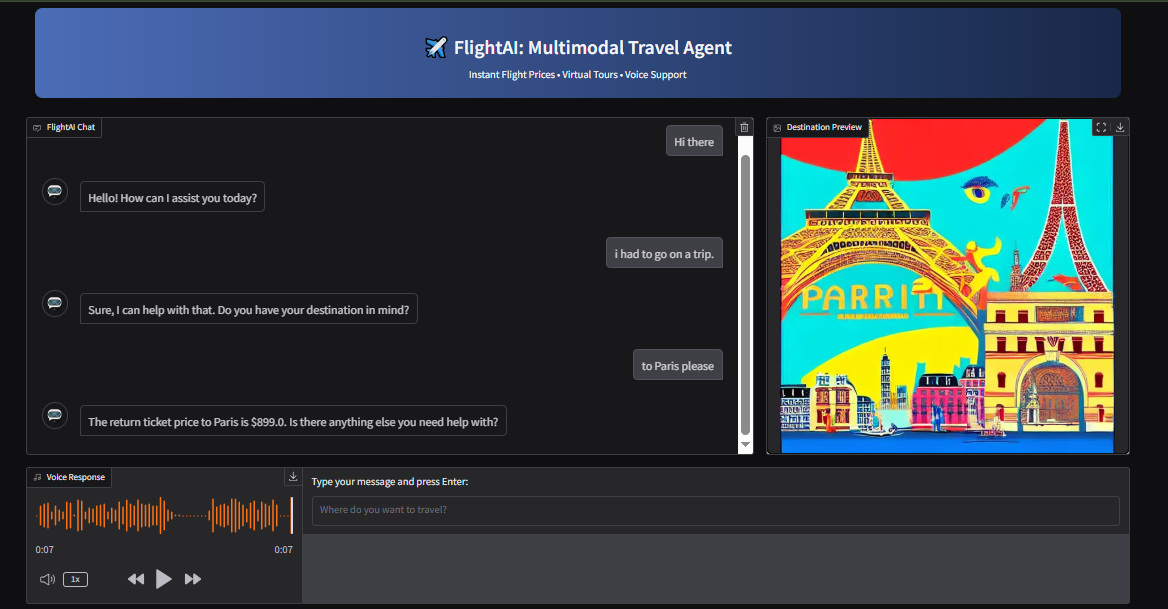

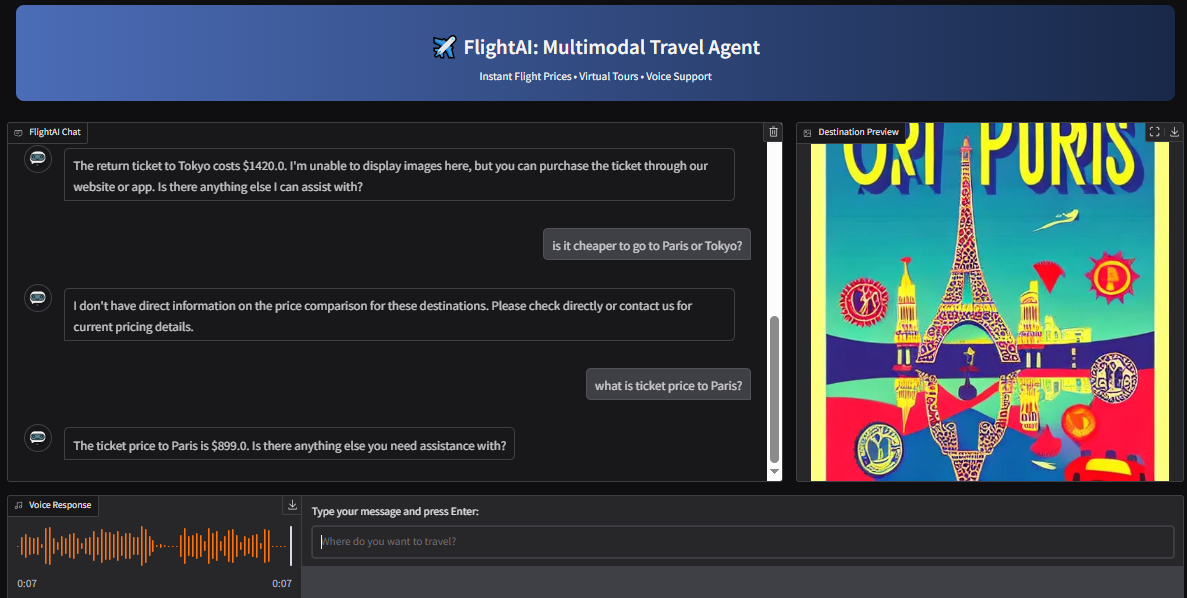

# ========================== 2. Ticket Booking Tool: ==================
Aik aisa tool banayein jo sirf qemat na bataye balkay database mein aik "Booking Record" insert kar sakay. Is se aapka assistant aik asli travel agent ban jayega jo transaction mukammal karta hai.

### Cell 9: Database Expansion (Adding Bookings Table)

In [ ]:
# Cell 9: Create a new 'bookings' table in the existing database
def setup_booking_table():
    with sqlite3.connect(DB) as conn:
        cursor = conn.cursor()
        # Creating a table to store city name and booking status
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS bookings
            (id INTEGER PRIMARY KEY AUTOINCREMENT, city TEXT, status TEXT)
        ''')
        conn.commit()

setup_booking_table()
print("Cell 9: 'bookings' table is now ready in the database!")

Cell 9: 'bookings' table is now ready in the database!


### Cell 10: The Booking Function & Tool Schema

In [ ]:
# 1. Python function to simulate flight booking
def book_flight(city):
    print(f"ACTION TOOL CALLED: Booking a flight to {city}...", flush=True)
    with sqlite3.connect(DB) as conn:
        cursor = conn.cursor()
        cursor.execute('INSERT INTO bookings (city, status) VALUES (?, ?)', (city.lower(), "Confirmed"))
        conn.commit()
    return f"Success! I have officially booked your return ticket to {city}. Your booking is confirmed in our system."

# 2. JSON Description for the 'book_flight' tool
booking_function_schema = {
    "name": "book_flight",
    "description": "Book a return flight ticket to a specific city for the customer.",
    "parameters": {
        "type": "object",
        "properties": {
            "city": {"type": "string", "description": "The destination city for the booking"}
        },
        "required": ["city"],
        "additionalProperties": False
    }
}

# 3. Update the global tools list to include BOTH tools
tools = [
    {"type": "function", "function": price_function}, # Existing Price Tool
    {"type": "function", "function": booking_function_schema} # New Booking Tool
]

print("Cell 10: Booking tool defined and registered with the AI!")

Cell 10: Booking tool defined and registered with the AI!


### Cell 11: Updating the Handler Logic

In [ ]:
# Updated handler to support both Pricing and Booking tools
def handle_tool_calls_and_return_cities(message):
    responses = []
    cities = []

    for tool_call in message.tool_calls:
        f_name = tool_call.function.name
        args = json.loads(tool_call.function.arguments)

        if f_name == "get_ticket_price":
            city = args.get('destination_city')
            cities.append(city)
            result = get_ticket_price(city)

        elif f_name == "book_flight": # Logic for the new challenge
            city = args.get('city')
            cities.append(city) # We still want a picture of the booked city!
            result = book_flight(city)

        responses.append({
            "role": "tool",
            "content": str(result),
            "tool_call_id": tool_call.id
        })

    return responses, cities

print("Cell 11: Handler updated! The AI is now a full-service agent.")

Cell 11: Handler updated! The AI is now a full-service agent.


### The Beautiful Multimodal UI

In [ ]:
# Updated CSS for better visibility and modern look
custom_css = """
.main-header {
    text-align: center;
    padding: 20px;
    background: linear-gradient(90deg, #4b6cb7 0%, #182848 100%);
    color: white;
    border-radius: 10px;
    margin-bottom: 20px;
}
.status-tag {
    font-size: 0.8em;
    color: #666;
    font-style: italic;
}
"""

with gr.Blocks(theme=gr.themes.Default(), css=custom_css) as ui:

    # Styled Title using HTML for maximum visibility
    gr.HTML(
        """
        <div class="main-header">
            <h1>✈️ FlightAI: Multimodal Travel Agent</h1>
            <p>Instant Flight Prices • Virtual Tours • Voice Support</p>
        </div>
        """
    )

    with gr.Row():
        # Chat column
        with gr.Column(scale=2):
            chatbot = gr.Chatbot(
                height=450,
                type="messages",
                label="FlightAI Chat",
                avatar_images=(None, "https://cdn-icons-png.flaticon.com/512/4712/4712035.png") # Optional Assistant Icon
            )

        # Visuals column
        with gr.Column(scale=1):
            image_output = gr.Image(
                height=450,
                label="Destination Preview",
                interactive=False
            )

    with gr.Group(): # Groups related components together visually
        with gr.Row():
            audio_output = gr.Audio(
                autoplay=True,
                label="Voice Response",
                scale=1
            )
            message = gr.Textbox(
                label="Type your message and press Enter:",
                placeholder="Where do you want to travel?",
                scale=3,
                container=True,
                autofocus=True # Focus cursor here on load
            )

    gr.Markdown("---")
    gr.Markdown("<p class='status-tag'>System Status: SQL Database Connected | Stable Diffusion Ready | gTTS Active</p>")

    # --- THE SUBMISSION LOGIC ---
    # This specifically handles the 'Enter' key press on the textbox
    submit_event = message.submit(
        put_message_in_chatbot,
        inputs=[message, chatbot],
        outputs=[message, chatbot]
    ).then(
        chat,
        inputs=chatbot,
        outputs=[chatbot, audio_output, image_output]
    )

# Launch with sharing enabled
ui.launch(debug=True, share=True)

/tmp/ipython-input-3960358971.py:18: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Default(), css=custom_css) as ui:
/tmp/ipython-input-3960358971.py:18: DeprecationWarning: The 'css' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'css' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Default(), css=custom_css) as ui:
/tmp/ipython-input-3960358971.py:33: DeprecationWarning: The default value of 'allow_tags' in gr.Chatbot will be changed from False to True in Gradio 6.0. You will need to explicitly set allow_tags=False if you want to disable tags in your chatbot.
  chatbot = gr.Chatbot(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3a1a9ab966322f588c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Generating Free Audio...
Generating Free Audio...
ACTION TOOL CALLED: Booking a flight to Paris...
Generating Free Audio...
Generating Free Image for Paris...


  0%|          | 0/50 [00:00<?, ?it/s]

ACTION TOOL CALLED: Booking a flight to Sydney...
Generating Free Audio...
Generating Free Image for Sydney...


  0%|          | 0/50 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://3a1a9ab966322f588c.gradio.live


# ======================== WEEK2 Excersice ===================

### Environment Setup (Installing Free Tools)

In [ ]:
# 1. Installing standard and multi-modal libraries
!apt-get update && apt-get install -y zstd # Ollama prerequisite
!pip install openai gradio python-dotenv diffusers transformers accelerate gTTS Pillow

# Install Ollama
!curl -fsSL https://ollama.com/install.sh | sh

# 2. Starting Ollama Server in background
import subprocess
import time

subprocess.Popen(["ollama", "serve"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
time.sleep(15) # Server boot time

!ollama pull qwen2.5:3b
!ollama pull llama3.2:3b

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

### Cell 0: Imports & Technical Expert Persona

In [ ]:
# Cell 0: Imports and System Prompt Definition
import os
from openai import OpenAI
import gradio as gr

# Initialize local Ollama client (assuming server is running from previous lab)
client = OpenAI(base_url='http://localhost:11434/v1', api_key='ollama')

# Technical Expert Persona: Giving the AI deep knowledge of LLMs and Coding
technical_system_prompt = """
You are a world-class Senior LLM Engineer and Technical Consultant.
Expertise: Transformers, Python, Vector Databases, and Agentic Workflows.
Style: Professional, concise, and helpful. Provide code snippets only when necessary.
If a technical question is outside your knowledge, explain why instead of hallucinating.
"""

# Fetch available models from Ollama to allow switching
# Note: Ensure you have pulled models like 'qwen2.5:3b' and 'llama3.2:3b'
available_models = ["qwen2.5:3b", "llama3.2:3b"]

print(f"Cell 0 Complete: Technical Expert Persona is set and models {available_models} are ready!")

Cell 0 Complete: Technical Expert Persona is set and models ['qwen2.5:3b', 'llama3.2:3b'] are ready!


### Cell 1: Streaming Logic with Model Selection

In [ ]:
# Cell 1: Streaming Function with Model Switching

# def chat_stream(message, history, model_name):
#     # Constructing the message history for the AI
#     messages = [{"role": "system", "content": technical_system_prompt}]
#     for user_msg, assistant_msg in history:
#         messages.append({"role": "user", "content": user_msg})
#         messages.append({"role": "assistant", "content": assistant_msg})

#     # Adding the current user message
#     messages.append({"role": "user", "content": message})

#     # Initializing the stream
#     # We use stream=True to get tokens one by one as they are generated
#     partial_message = ""
#     response = client.chat.completions.create(
#         model=model_name, # This allows switching between models
#         messages=messages,
#         stream=True
#     )

#     # Yielding tokens to the Gradio UI in real-time
#     for chunk in response:
#         if chunk.choices[0].delta.content is not None:
#             partial_message += chunk.choices[0].delta.content
#             yield partial_message

# print("Cell 1 Complete: Streaming and Switching logic is ready!")


# ------------------------------------------------------------------------
# Updated Cell 1: Streaming with Dictionary Format

def chat_stream(history, model_name):
    # history is now a list of dicts: [{"role": "user", "content": "..."}]
    # We pass the entire history directly to the model
    messages = [{"role": "system", "content": technical_system_prompt}] + history

    partial_message = ""
    # Call Ollama with streaming enabled
    response = client.chat.completions.create(
        model=model_name,
        messages=messages,
        stream=True
    )

    for chunk in response:
        if chunk.choices[0].delta.content is not None:
            partial_message += chunk.choices[0].delta.content
            # FIX: Yield the FULL history plus the new assistant message as a dict
            # This satisfies the "messages" format requirement
            yield history + [{"role": "assistant", "content": partial_message}]

print("Cell 1 Updated: Now yielding compatible dictionary format.")

Cell 1 Updated: Now yielding compatible dictionary format.


### Quick Fix: Restart the Engine

In [ ]:
# 1. Purane dead processes ko khatam karein
!pkill ollama

# 2. Ollama server ko dobara background mein start karein
import subprocess
import time

subprocess.Popen(["ollama", "serve"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# 3. Wait for 20 seconds for the server to initialize
print("Restarting the Brain (Ollama)... please wait.")
time.sleep(20)

# 4. Verify connection
!curl http://localhost:11434/api/tags

Restarting the Brain (Ollama)... please wait.
{"models":[{"name":"llama3.2:3b","model":"llama3.2:3b","modified_at":"2026-01-18T04:15:03.022565795Z","size":2019393189,"digest":"a80c4f17acd55265feec403c7aef86be0c25983ab279d83f3bcd3abbcb5b8b72","details":{"parent_model":"","format":"gguf","family":"llama","families":["llama"],"parameter_size":"3.2B","quantization_level":"Q4_K_M"}},{"name":"qwen2.5:3b","model":"qwen2.5:3b","modified_at":"2026-01-18T04:13:25.169030389Z","size":1929912432,"digest":"357c53fb659c5076de1d65ccb0b397446227b71a42be9d1603d46168015c9e4b","details":{"parent_model":"","format":"gguf","family":"qwen2","families":["qwen2"],"parameter_size":"3.1B","quantization_level":"Q4_K_M"}}]}

### Cell 2: The Professional Technical Expert UI

In [ ]:
# # Cell 2: Building the Technical Expert Interface

# with gr.Blocks(theme=gr.themes.Soft()) as technical_ui:
#     # 1. Title and Header
#     gr.Markdown(
#         """
#         # 🛠️ Technical LLM Expert Assistant
#         ### Senior Engineer Prototype - Week 2 Final Exercise
#         """
#     )

#     # 2. Model Selection Dropdown
#     with gr.Row():
#         model_dropdown = gr.Dropdown(
#             choices=available_models,
#             value=available_models[0],
#             label="Select Brain (Model):",
#             info="Switch between different local models for varying expertise."
#         )

#     # 3. Chat Window
#     chatbot = gr.Chatbot(height=500, type="messages", label="Technical Discussion")

#     # 4. Input Box
#     with gr.Row():
#         message = gr.Textbox(
#             label="Ask a technical question:",
#             placeholder="e.g., Explain the difference between Self-Attention and Cross-Attention.",
#             scale=4
#         )
#         clear = gr.ClearButton([message, chatbot])

#     # 5. Hooking up the events with Streaming and Selection
#     # Note: We pass the model_dropdown as an input to the chat_stream function
#     message.submit(
#         chat_stream,
#         inputs=[message, chatbot, model_dropdown],
#         outputs=chatbot
#     )

# # Launching the technical prototype
# technical_ui.launch(debug=True)

# ------------------------------------------------------------------------------------------------------
# Updated Cell 2: Professional UI with State Management

def put_message_in_chatbot(user_msg, chat_history):
    # Returns empty string for textbox and appends user message to history
    return "", chat_history + [{"role": "user", "content": user_msg}]

with gr.Blocks(theme=gr.themes.Soft()) as technical_ui:
    gr.HTML("<div style='text-align: center;'><h1>🛠️ Technical LLM Expert</h1></div>")

    with gr.Row():
        model_dropdown = gr.Dropdown(
            choices=available_models,
            value=available_models[0],
            label="Select Model"
        )

    # Ensure type="messages" matches our yield format
    chatbot = gr.Chatbot(height=500, type="messages")

    with gr.Row():
        message = gr.Textbox(label="Technical Question:", placeholder="Press Enter to send", scale=4)
        clear = gr.ClearButton([message, chatbot])

    # Event Flow:
    # 1. put_message_in_chatbot adds user msg to UI
    # 2. .then() calls chat_stream with the updated chatbot history
    message.submit(
        put_message_in_chatbot,
        inputs=[message, chatbot],
        outputs=[message, chatbot]
    ).then(
        chat_stream,
        inputs=[chatbot, model_dropdown],
        outputs=chatbot
    )

technical_ui.launch(debug=True)

/tmp/ipython-input-3756185308.py:51: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Soft()) as technical_ui:
/tmp/ipython-input-3756185308.py:62: DeprecationWarning: The default value of 'allow_tags' in gr.Chatbot will be changed from False to True in Gradio 6.0. You will need to explicitly set allow_tags=False if you want to disable tags in your chatbot.
  chatbot = gr.Chatbot(height=500, type="messages")


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4d4e5dac4d9db937d7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://4d4e5dac4d9db937d7.gradio.live


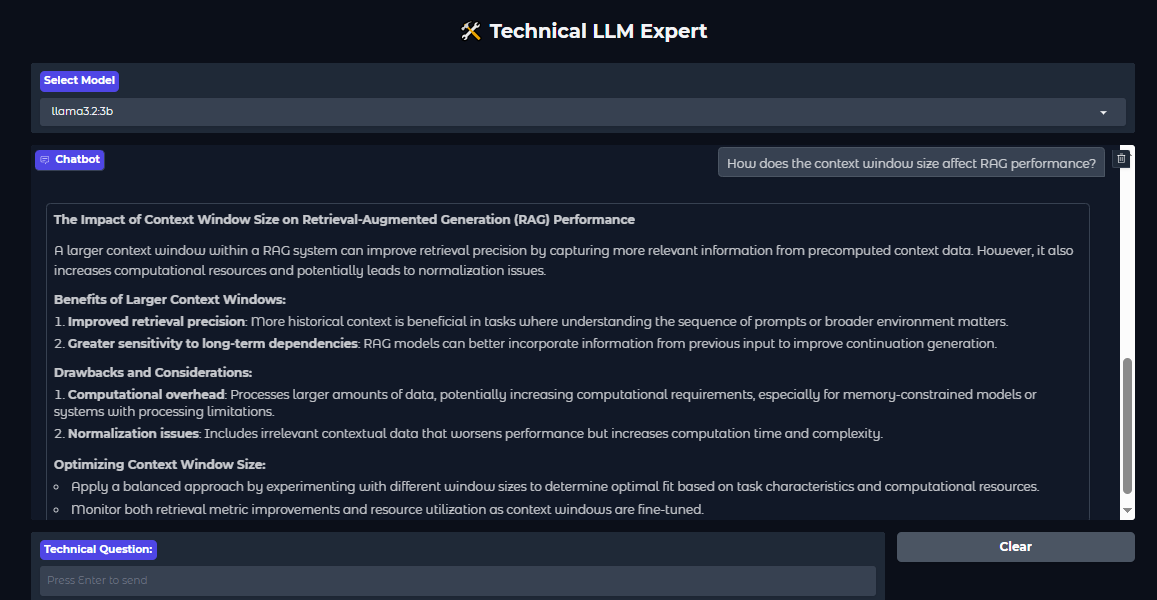

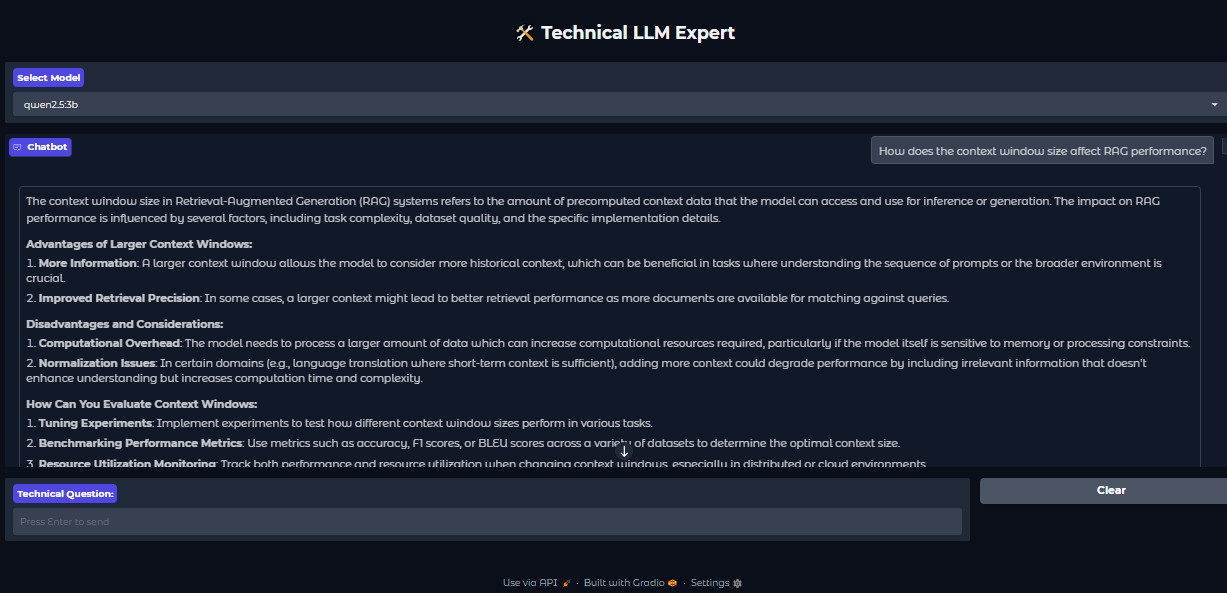

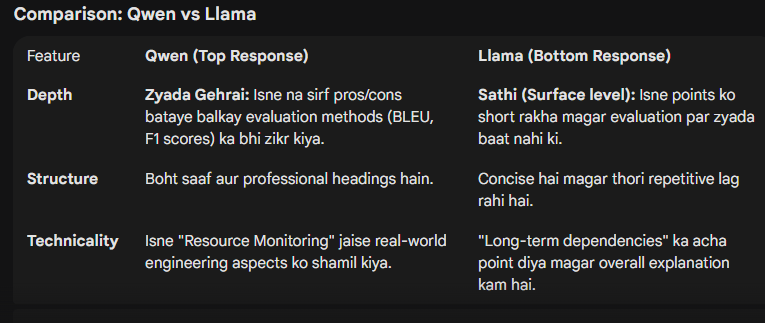

# =================== Extra Lab (SVG Challenge)===================

### Cell 0: Configuring Open Router using Colab Secrets & Key Acess

In [ ]:
# Cell 0: Configuration for Gemini 2.5 Flash Lite
import os
from openai import OpenAI
from google.colab import userdata

OPENROUTER_API_KEY = userdata.get('OPENROUTER_API_KEY')

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=OPENROUTER_API_KEY,
  default_headers={
    "HTTP-Referer": "https://colab.research.google.com/",
    "X-Title": "FlightAI SVG Challenge",
  }
)

# Using the specific stable ID for Gemini 2.5 Flash Lite
MODEL_SVG = "google/gemini-2.5-flash-lite"

print(f"Cell 0 Fix: Model updated to {MODEL_SVG}. Ready for high-speed drawing!")


Cell 0 Fix: Model updated to google/gemini-2.5-flash-lite. Ready for high-speed drawing!


In [ ]:
# Cell 0.1: Debugging the API Key
from google.colab import userdata

try:
    test_key = userdata.get('OPENROUTER_API_KEY')
    if test_key and len(test_key) > 10:
        print(f" Key found! It starts with: {test_key[:8]}...")
    else:
        print(" Key is too short or empty. Please check Colab Secrets.")
except Exception as e:
    print(f" Error accessing Secret: {e}")
    print("Hint: Check if the Secret name is 'OPENROUTER_API_KEY' and 'Notebook access' is ON.")

 Key found! It starts with: sk-or-v1...


### Step 1: SVG Lab Setup

In [ ]:
# Updated Cell 0: Re-configuring the Client
import os
from openai import OpenAI
from google.colab import userdata

# Getting the key again
OPENROUTER_API_KEY = userdata.get('OPENROUTER_API_KEY')

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=OPENROUTER_API_KEY,
  # OpenRouter optional but recommended headers
  default_headers={
    "HTTP-Referer": "https://colab.research.google.com/",
    "X-Title": "FlightAI SVG Challenge",
  }
)

# Using an available model
MODEL_SVG = "google/gemini-2.5-flash-lite"

print(f"Client re-initialized for {MODEL_SVG}")

Client re-initialized for google/gemini-2.5-flash-lite


### Cell 1: The SVG Artist Function

Model google/gemini-2.5-flash-lite is drawing: A panda rollerblading to work...


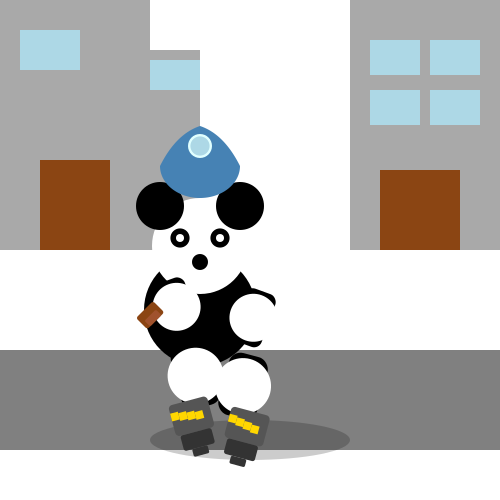


Success: Gemini 2.5 Flash Lite rendered the masterpiece!


In [ ]:
# Cell 1: SVG Artist with Gemini 2.5 Flash Lite
from IPython.display import SVG, display

def draw_with_ai(challenge, model=MODEL_SVG):
    # Prompting for pure SVG code to avoid parsing errors
    prompt = f"Generate an SVG for this: {challenge}. Respond ONLY with the code starting with <svg and ending with </svg>."

    print(f"Model {model} is drawing: {challenge}...", flush=True)

    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}]
    )

    raw_output = response.choices[0].message.content

    # Extracting only the XML part to avoid ExpatError
    start_index = raw_output.find("<svg")
    end_index = raw_output.find("</svg>") + 6

    if start_index != -1 and end_index != -1:
        svg_code = raw_output[start_index:end_index]
        return svg_code
    else:
        print("Error: Could not find valid SVG tags in the response.")
        return None

challenge_text = "A panda rollerblading to work"
panda_svg = draw_with_ai(challenge_text)

if panda_svg:
    display(SVG(panda_svg))
    print("\nSuccess: Gemini 2.5 Flash Lite rendered the masterpiece!")



### Cell 2: The Revealer (Animating the SVG Drawing)

In [ ]:
# Cell 2: The Revealer Script to animate the SVG
import time
from IPython.display import HTML, display

def reveal_svg(svg_code):
    # This script adds a CSS animation to each path in the SVG
    animated_svg = svg_code.replace("<path", '<path class="draw-line"')

    html_content = f"""
    <style>
        .draw-line {{
            stroke-dasharray: 1000;
            stroke-dashoffset: 1000;
            animation: draw 5s linear forwards;
        }}
        @keyframes draw {{
            to {{
                stroke-dashoffset: 0;
            }}
        }}
    </style>
    <div style="background: white; padding: 20px; border-radius: 10px;">
        {animated_svg}
    </div>
    """
    display(HTML(html_content))

# Run the animation for your generated Panda
print("Revealing the AI's masterpiece line by line...")
reveal_svg(panda_svg)

Revealing the AI's masterpiece line by line...
